# Predicting prices for Bitcoin

### Project 1

Project description:
- Read data into Jupyter notebook, use pandas to import data into a data frame
- preprocess data: explore data, address missing data, categorical data, if there is any, and data scaling. Justify the type of scaling used in this project. 
- train your dataset using all the linear regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN repressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

#### Importing the required python libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import os

#### Importing the datasets

In [4]:
data = pd.read_csv(r"D:\Box Sync\University of Texas\Spring 2018\BUAN 6341\Project\bitcoin_dataset.csv")
testData =pd.read_csv(r"D:\Box Sync\University of Texas\Spring 2018\BUAN 6341\Project\test_set.csv")
data.head(10)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0
5,2/22/2010 0:00,0.0,2098150.0,0.0,0.0,0.0,0.000384,0,1.0,0.0,...,65.214056,0.0,262,261,42361,261,261,32350.00,19551.0,0.0
6,2/23/2010 0:00,0.0,2110700.0,0.0,0.0,0.0,0.000216,0,1.0,0.0,...,25100.000000,0.0,252,252,42613,252,252,12600.00,50.0,0.0
7,2/24/2010 0:00,0.0,2120200.0,0.0,0.0,0.0,0.000282,0,1.0,0.0,...,179.245283,0.0,195,196,42809,196,196,14800.00,5300.0,0.0
8,2/25/2010 0:00,0.0,2127600.0,0.0,0.0,0.0,0.000227,0,1.0,0.0,...,1057.142857,0.0,150,150,42959,150,150,8100.00,700.0,0.0
9,2/26/2010 0:00,0.0,2136100.0,0.0,0.0,0.0,0.000319,0,1.0,0.0,...,64.582059,0.0,176,176,43135,176,176,29349.00,13162.0,0.0


#### Getting an overview of data statistics

In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


#### count the number of NaN values in each column

In [6]:
data.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

A lot of columns have missing values in them. One possible solution will be to replace Nan Values with the median values for the year, provided the value are significantly different for all years

#### converting date to datetype
- Extracting year value from the date
- Checking the trend of btc_total_bitcoins, btc_trade_volume across years

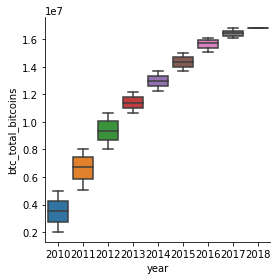

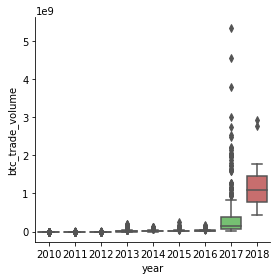

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year
g = sns.factorplot("year", "btc_total_bitcoins", data=data, kind="box",legend = False)
g = sns.factorplot("year", "btc_trade_volume" ,data=data, kind="box", palette="muted", legend=False)
plt.show()

#### Imputing the missing values
The values of the variable seem to vary across the year, so we can use median value for the year to impute missing values


In [8]:
data['btc_trade_volume'] = data['btc_trade_volume'].fillna(data.groupby('year')['btc_trade_volume'].transform('median'))
data['btc_total_bitcoins'] = data['btc_total_bitcoins'].fillna(data.groupby('year')['btc_total_bitcoins'].transform('median'))
data['btc_blocks_size'] = data['btc_blocks_size'].fillna(data.groupby('year')['btc_blocks_size'].transform('median'))
data['btc_transaction_fees'] = data['btc_transaction_fees'].fillna(data.groupby('year')['btc_transaction_fees'].transform('median'))
data['btc_median_confirmation_time'] = data['btc_median_confirmation_time'].fillna(data.groupby('year')['btc_median_confirmation_time'].transform('median'))
data['btc_difficulty'] = data['btc_difficulty'].fillna(data.groupby('year')['btc_difficulty'].transform('median'))

#### Checking whether there are anymore missing values

In [9]:
data.isnull().sum()

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

#### checking the correlation between various features
Before we begin create our model, let's check the relation among variables
- There seems to be a high correlation between a lot of variables. We need to reduce the number of variables before we can go ahead with the analysis

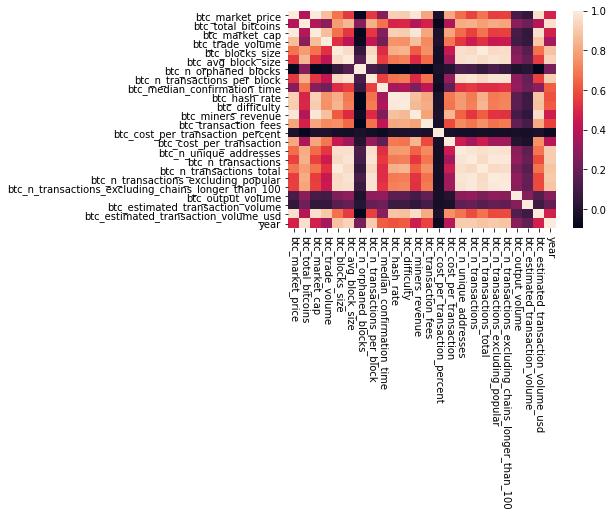

In [10]:
corr = data.corr()
g=sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.setp(g.get_xticklabels(), 'rotation', -90)
plt.setp(g.get_yticklabels(), 'rotation', 0)
plt.show()

#### Splitting data in test and train

In [11]:
X = data.iloc[:,2:24]
Y = data.iloc[:,[1]]
validation_size = 0.30
seed = 9
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#### Checking the shape for test and train dataset

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

(2034, 22)
(2034, 1)
(872, 22)
(872, 1)


#### Scaling the trainning data set before using the PCA
- We are going to prefer the standardization over min-max scaling because for PCA we are interested in the components that maximize the variance
- using min max saclling we will end up with smaller standard deviations, which can suppress the effect of outliers

In [13]:
std=preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(std.transform(X_train))
X_validation_std = pd.DataFrame(std.transform(X_validation))
#Y_train_std = std.transform(Y_train)
#Y_validation_std = std.transform(Y_validation)
X_train.head(5)

,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
2690,16419900.0,4.068262e+10,1.037184e+08,122298.19290,0.956314,0,1736.103896,11.883333,5.448314e+06,7.116970e+11,...,0.752557,21.149026,533427,267360,236165171,259782,177910,3.475034e+06,303255.8655,751359279.5
2469,15999912.5,1.182314e+10,1.874184e+07,90883.41807,0.923046,1,2052.957143,17.300000,1.961176e+06,2.818010e+11,...,0.705658,4.744821,490392,287414,172676678,282436,202961,1.566281e+06,261528.2988,193256336.4
1414,12203800.0,9.115018e+09,1.490825e+07,13488.00000,0.102706,0,381.000000,6.466667,1.174080e+04,1.180923e+09,...,6.623609,90.202095,83356,41476,30246540,33625,23125,5.250079e+05,75623.0000,56483139.0
934,9894050.0,1.109123e+08,3.107030e+05,2619.00000,0.101257,0,192.000000,13.400000,1.874906e+01,2.694048e+06,...,3.956688,2.291331,30088,34359,6895008,14589,13086,1.147049e+07,177497.0000,1989741.0
2735,16506987.5,7.069930e+10,1.680213e+08,128514.95030,0.955263,0,1964.323077,17.375000,5.966241e+06,9.232330e+11,...,0.918844,31.434330,542909,255362,246685023,247068,172251,2.822187e+06,203972.3451,873611922.5


In [14]:
X_train_std.head(5)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.170042,0.695720,0.107336,1.997199,1.708156,-0.439062,1.539795,0.866060,1.412652,1.433480,...,-0.037964,0.303919,1.627870,1.596764,2.019629,1.597924,1.651977,0.771713,0.337571,0.966674
1,1.069852,-0.046163,-0.193951,1.275079,1.613877,0.701491,2.000389,1.948654,0.237062,0.303334,...,-0.037987,-0.483794,1.420888,1.790945,1.252892,1.817171,2.013099,-0.006995,0.190329,-0.014768
2,0.164272,-0.115779,-0.207543,-0.503984,-0.710867,-0.439062,-0.430056,-0.216535,-0.420134,-0.434382,...,-0.035072,3.619777,-0.536800,-0.590450,-0.467206,-0.590843,-0.579321,-0.431801,-0.465669,-0.255287
3,-0.386729,-0.347245,-0.259299,-0.753826,-0.714972,-0.439062,-0.704796,1.169186,-0.424086,-0.437480,...,-0.036386,-0.601608,-0.792999,-0.659364,-0.749217,-0.775075,-0.724038,4.033595,-0.106190,-0.351116
4,1.190817,1.467349,0.335324,2.140102,1.705176,-0.439062,1.871546,1.963643,1.587256,1.989583,...,-0.037882,0.797809,1.673475,1.480588,2.146675,1.474877,1.570400,0.505373,-0.012767,1.181659


In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=22)
pca.fit(X_train_std)

PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
np.set_printoptions(suppress=True)
cum = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
#np.round(pca.explained_variance_ratio_,decimals=4)*100

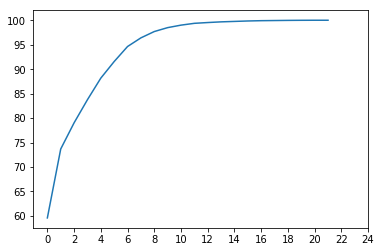

In [17]:
plt.plot(cum)
plt.xticks(np.arange(0, 25, 2))
plt.show()

#### Looking at above plot we can take 12 variables

In [18]:
pca = PCA(n_components=12)
trans = pca.fit(X_train_std)
X_train_trans = trans.transform(X_train_std)
X_validation_trans = trans.transform(X_validation_std)

## Using liner regression
- We see a model fit of close ~ 99%
- Cross validation is a better approximation for model accuracy

In [74]:
store_accuracy=[]
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train_trans,Y_train)
print(regr.score(X_train_trans,Y_train))
#using ccross validation for accessing model accuracy
scores = cross_val_score(regr, X_train_trans, Y_train, cv=10 , scoring='r2')
print(scores)
print(scores.mean())
print(regr.score(X_validation_trans,Y_validation))


0.993119790048
[ 0.98893627  0.99212709  0.98880564  0.99488927  0.99201199  0.99371556
  0.99558789  0.99424834  0.9883993   0.99450529]
0.992322664535
0.992931483298


#### Using Kfold for validation

In [76]:
scores = cross_val_score(regr, X_train_trans, Y_train,cv=10)
print (scores)
print(scores.mean())
store_accuracy.append(['Liner regression',scores.mean()])

[ 0.98893627  0.99212709  0.98880564  0.99488927  0.99201199  0.99371556
  0.99558789  0.99424834  0.9883993   0.99450529]
0.992322664535


#### Predicting bitcoin prices for trainning set
Visualizing the predicted and the actual values from linerar regression

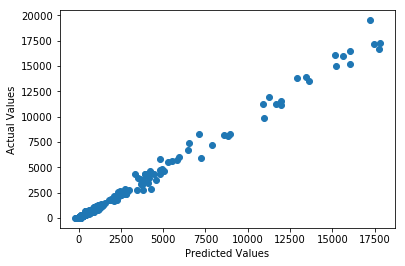

79.8023392467
36444.0545395
190.903259636


In [79]:
Y_pred = pd.DataFrame(regr.predict(X_validation_trans))
plt.scatter(Y_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, Y_pred))
print(metrics.mean_squared_error(Y_validation, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, Y_pred)))

# Using KNN for model fit 
Using gridSearch to optimize model selection

In [26]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 20))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [27]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


- Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric
    - In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times
    - Each time, the n_neighbors parameter should be given a different value from the list
    - We can't give GridSearchCV just a list
- We've to specify n_neighbors should take on 1 through 19
- Best result is for n_neighbours = 1
- Accuracy decreases steeply for K = 8, so we are going to use K = 7 for this model

In [28]:
# instantiate the grid
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2')
# fit the grid with data
grid.fit(X_train_trans, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [29]:
# displaying the complete results
grid.grid_scores_

[mean: 0.99042, std: 0.00664, params: {'n_neighbors': 1},
 mean: 0.99069, std: 0.00459, params: {'n_neighbors': 2},
 mean: 0.99042, std: 0.00514, params: {'n_neighbors': 3},
 mean: 0.99028, std: 0.00640, params: {'n_neighbors': 4},
 mean: 0.99041, std: 0.00635, params: {'n_neighbors': 5},
 mean: 0.99069, std: 0.00630, params: {'n_neighbors': 6},
 mean: 0.99031, std: 0.00673, params: {'n_neighbors': 7},
 mean: 0.98936, std: 0.00741, params: {'n_neighbors': 8},
 mean: 0.98875, std: 0.00814, params: {'n_neighbors': 9},
 mean: 0.98782, std: 0.00875, params: {'n_neighbors': 10},
 mean: 0.98798, std: 0.00841, params: {'n_neighbors': 11},
 mean: 0.98771, std: 0.00861, params: {'n_neighbors': 12},
 mean: 0.98758, std: 0.00908, params: {'n_neighbors': 13},
 mean: 0.98701, std: 0.00955, params: {'n_neighbors': 14},
 mean: 0.98629, std: 0.00956, params: {'n_neighbors': 15},
 mean: 0.98587, std: 0.00967, params: {'n_neighbors': 16},
 mean: 0.98582, std: 0.00941, params: {'n_neighbors': 17},
 mean:

In [30]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9904232140723225, 0.9906933403586782, 0.9904227791916782, 0.9902846832022396, 0.9904091122358364, 0.9906866325163025, 0.9903078435472702, 0.9893594957122472, 0.9887526525063549, 0.9878211603671088, 0.9879807500308188, 0.9877076523735825, 0.9875770551600486, 0.9870054140385993, 0.986290772606844, 0.9858737018131358, 0.9858202353329413, 0.9860219249950116, 0.9858051168285511]


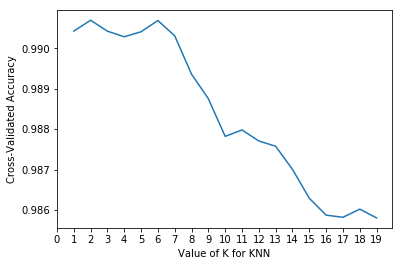

In [31]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(np.arange(0, 20, 1))
plt.show()

In [32]:
# examine k =7 tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[6].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[6].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[6].mean_validation_score)

Parameters
{'n_neighbors': 7}

CV Validation Score
[ 0.992451    0.99702387  0.99357407  0.99251017  0.99090311  0.98084567
  0.99055744  0.9960248   0.9745831   0.99453462]

Mean Validation Score
0.9903078435472702


#### Trainning data with k =7

In [33]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_trans,Y_train)
print(knn.score(X_train_trans,Y_train))
print(knn.score(X_validation_trans,Y_validation))
store_accuracy.append(['KNN',knn.score(X_validation_trans,Y_validation)])

0.993562843057
0.98845165937


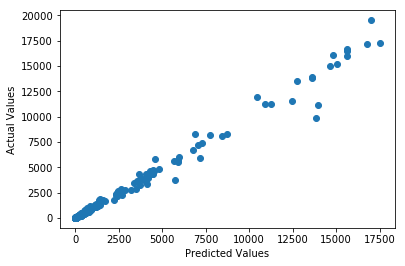

61.3442973899
59541.2550509
244.010768309


In [80]:
knn_pred = pd.DataFrame(knn.predict(X_validation_trans))
plt.scatter(knn_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, knn_pred))
print(metrics.mean_squared_error(Y_validation, knn_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, knn_pred)))

# Fitting model data using Ridge regression
- Since ridge regression penalizes coefficient, we need to scale all the feature to a comparable scale
- Using MinMax from sklearn to normalize the features

In [34]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_trans)
X_validation_scaled = scaler.transform(X_validation_trans)

In [35]:
#Using grid search to find optimal parameters
# define the parameter values that should be searched
RrParam = list(np.arange(0, 1, 0.1))
print(RrParam)

[0.0, 0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.60000000000000009, 0.70000000000000007, 0.80000000000000004, 0.90000000000000002]


In [36]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(alpha=RrParam)
print(param_grid)

{'alpha': [0.0, 0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.60000000000000009, 0.70000000000000007, 0.80000000000000004, 0.90000000000000002]}


In [37]:
RR = Ridge()
grid = GridSearchCV(RR, param_grid, cv=10, scoring='r2')
# fit the grid with data
grid.fit(X_train_scaled, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0, 0.10000000000000001, 0.20000000000000001, 0.30000000000000004, 0.40000000000000002, 0.5, 0.60000000000000009, 0.70000000000000007, 0.80000000000000004, 0.90000000000000002]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

[0.992320436222007, 0.9922408531496111, 0.9920730812336194, 0.9918343311277337, 0.9915377912459596, 0.9911934196678807, 0.9908087829057656, 0.990389688618462, 0.989940643516133, 0.9894651839624585]


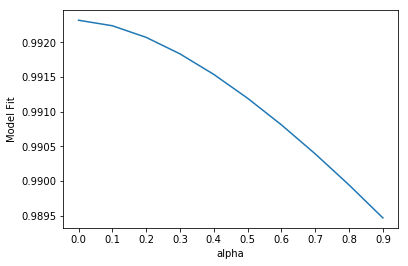

In [38]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)
plt.plot(RrParam,grid_mean_scores)
plt.xlabel("alpha")
plt.ylabel("Model Fit")
plt.xticks(np.arange(0,1,0.1))
plt.show()

In [39]:
## Checking for best score
print(grid.best_estimator_)

# examine alpha =1 tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Ridge(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Parameters
{'alpha': 0.0}

CV Validation Score
[ 0.98893627  0.99212709  0.98880564  0.99488927  0.99201199  0.99371556
  0.99558789  0.99424834  0.9883993   0.99450529]

Mean Validation Score
0.992320436222007


In [89]:
# Trainning model with alpha = 0
RR = Ridge(alpha=1)
RR.fit(X_train_scaled,Y_train)
print(RR.score(X_train_scaled,Y_train))
print(RR.score(X_validation_scaled,Y_validation))
store_accuracy.append(['Ridge',RR.score(X_validation_scaled,Y_validation)])

0.990527870909
0.990708325449


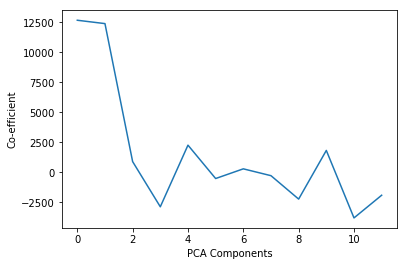

In [130]:
#plotting regression output
plt.plot(RR.coef_.ravel())
plt.xlabel("PCA Components")
plt.ylabel("Co-efficient")
plt.show()

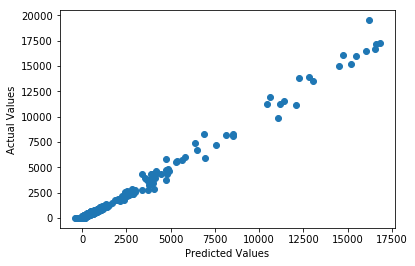

89.2288490427
47906.273465
218.87501791


In [82]:
RR_pred = pd.DataFrame(RR.predict(X_validation_scaled))
plt.scatter(RR_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, RR_pred))
print(metrics.mean_squared_error(Y_validation, RR_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, RR_pred)))

# Fitting data using lasso regression
- Using GridSearch to iterate and find optimal values of alpha
- Just like the ridge regression, we need to scale the variables here as well

In [41]:
#initialing parameters for Lasso regression
LR_range = np.arange(0,1,0.1)
print(LR_range)
LR_param = dict(alpha = LR_range)
print(LR_param)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
{'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])}


In [42]:
LR = Lasso()
grid = GridSearchCV(LR,LR_param,cv = 10, scoring='r2')
grid.fit(X_train_scaled,Y_train)


C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\cross_validation.py:1675: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\cross_validation.py:1675: UserWarning: With alpha=0, this algorithm does not

C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\grid_search.py:620: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_estimator.fit(X, y, **self.fit_params)
C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Airflowjhonson\AppData\Local\conda\conda\envs\6341\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

[0.9923204362220068, 0.9922857968118394, 0.9922207811030979, 0.9921257865180861, 0.9920008130568044, 0.9918457278873891, 0.9916607234176177, 0.9914539875702078, 0.9912365960169437, 0.9910000822690314]


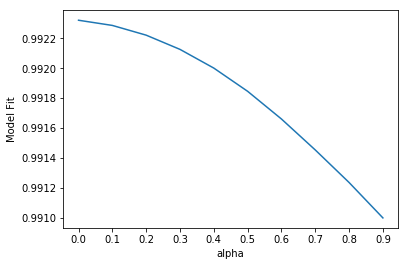

In [43]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)
plt.plot(LR_range,grid_mean_scores)
plt.xlabel("alpha")
plt.ylabel("Model Fit")
plt.xticks(np.arange(0,1,0.1))
plt.show()

In [44]:
# finding the best parameter for Lasso regression
## Checking for best score
print(grid.best_estimator_)

# examine alpha =1 tuple
# we will slice the list and select its elements using dot notation and []


print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Lasso(alpha=0.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Parameters
{'alpha': 0.0}

CV Validation Score
[ 0.98893627  0.99212709  0.98880564  0.99488927  0.99201199  0.99371556
  0.99558789  0.99424834  0.9883993   0.99450529]

Mean Validation Score
0.9923204362220068


In [45]:
# trainning data with best parameter estimates
LR = Lasso(alpha = 1.0)
LR.fit(X_train_scaled,Y_train)
print(LR.score(X_train_scaled,Y_train))
print(LR.score(X_validation_scaled,Y_validation))
store_accuracy.append(['Lasso',LR.score(X_validation_scaled,Y_validation)])

0.992034029336
0.992233810506


In [124]:
LR.coef_

array([ 12922.89069443,  12973.95511464,    711.39078214,  -3333.52267599,
         2382.47746811,    -81.67738266,      0.17984818,    -91.58250812,
        -2303.11622543,   1795.39486948,  -4605.69388996,  -1904.05499985])

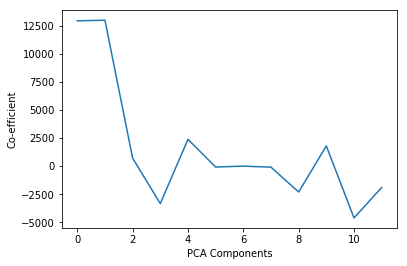

In [107]:
#plotting regression output
plt.plot(LR.coef_)
plt.xlabel("PCA Components")
plt.ylabel("Co-efficient")
plt.show()

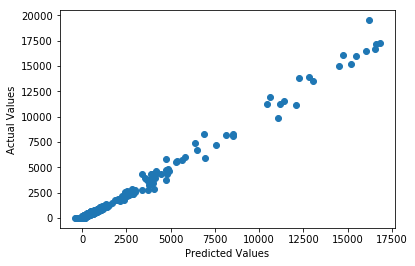

85.5549588601
40041.1352814
200.102811778


In [83]:
LR_pred = pd.DataFrame(LR.predict(X_validation_scaled))
plt.scatter(RR_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, LR_pred))
print(metrics.mean_squared_error(Y_validation, LR_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, LR_pred)))

# Using SVM for model fit
- Need to find the optimal values for C and lambda using grid search

In [46]:
# defining ranges for c and lambda
C_range = list([1000,1200,1500,1700,2000,100000])
gamma_range = list([0.001,0.01,0.05,0.1,1,10,100])
param_grid = dict(gamma = gamma_range,C=C_range)
print(param_grid)

{'C': [1000, 1200, 1500, 1700, 2000, 100000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}


## Using linear function

In [47]:
#mod = SVR(kernel ='linear',gamma = 0,C = 0)
svm = SVR(kernel='linear')
grid = GridSearchCV(svm,param_grid,cv=10,scoring='r2')
grid.fit(X_train_scaled,Y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1000, 1200, 1500, 1700, 2000, 100000], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [48]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)
print(grid.best_params_)

[0.9882679181435364, 0.9882679181435364, 0.9882679181435364, 0.9882679181435364, 0.9882679181435364, 0.9882679181435364, 0.9882679181435364, 0.9895175408757569, 0.9895175408757569, 0.9895175408757569, 0.9895175408757569, 0.9895175408757569, 0.9895175408757569, 0.9895175408757569, 0.9901885537134538, 0.9901885537134538, 0.9901885537134538, 0.9901885537134538, 0.9901885537134538, 0.9901885537134538, 0.9901885537134538, 0.9905001120396718, 0.9905001120396718, 0.9905001120396718, 0.9905001120396718, 0.9905001120396718, 0.9905001120396718, 0.9905001120396718, 0.9906328867568227, 0.9906328867568227, 0.9906328867568227, 0.9906328867568227, 0.9906328867568227, 0.9906328867568227, 0.9906328867568227, 0.9919280707487318, 0.9919280707487318, 0.9919280707487318, 0.9919280707487318, 0.9919280707487318, 0.9919280707487318, 0.9919280707487318]
{'C': 100000, 'gamma': 0.001}


In [121]:
# using svr wtih best parameter
svm = SVR(kernel = 'linear',gamma = 0.001, C = 100000 )
svm.fit(X_train_scaled,Y_train.values.ravel())
print(svm.score(X_train_scaled,Y_train.values.ravel()))
print(svm.score(X_validation_scaled,Y_validation.values.ravel()))
store_accuracy.append(['SVM w/ linear',svm.score(X_validation_scaled,Y_validation.values.ravel())])

0.992731061144
0.992679198638


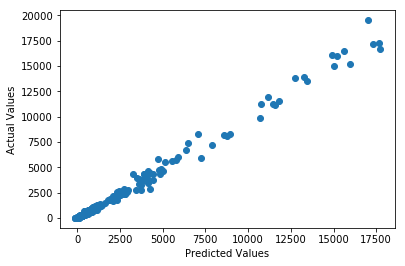

75.1967113393
37744.7907933
194.280186312


In [122]:
svm_pred = pd.DataFrame(svm.predict(X_validation_scaled))
plt.scatter(svm_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, svm_pred))
print(metrics.mean_squared_error(Y_validation, svm_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, svm_pred)))

## Using rbf kernel

In [50]:
# defining ranges for c and lambda
C_range = list([1500,1700,2000,100000])
gamma_range = list([0.001,0.01])
param_grid = dict(gamma = gamma_range,C=C_range)
print(param_grid)
svm = SVR(kernel='rbf')
grid = GridSearchCV(svm,param_grid,cv=10,scoring='r2')
grid.fit(X_train_scaled,Y_train.values.ravel())

{'C': [1500, 1700, 2000, 100000], 'gamma': [0.001, 0.01]}


GridSearchCV(cv=10, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [1500, 1700, 2000, 100000], 'gamma': [0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [51]:
# create a list of the mean scores only
# list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)
print(grid.best_params_)

[-0.024168196294733324, 0.234390202838193, -0.018100394558662275, 0.2590055908311078, -0.009198121874246859, 0.2928874717034144, 0.7899084345087685, 0.9907684990843633]
{'C': 100000, 'gamma': 0.01}


In [115]:
# using svr wtih best parameter
svm = SVR(kernel = 'rbf',gamma = 0.01, C = 100000 )
svm.fit(X_train_scaled,Y_train.values.ravel())
print(svm.score(X_train_scaled,Y_train.values.ravel()))
print(svm.score(X_validation_scaled,Y_validation.values.ravel()))
store_accuracy.append(['SVM w/ rbf',svm.score(X_validation_scaled,Y_validation.values.ravel())])

0.991615132833
0.991776709982


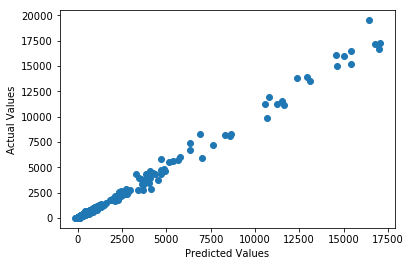

74.4695193034
42397.8668448
205.907422996


In [120]:
svm_pred = pd.DataFrame(svm.predict(X_validation_scaled))
plt.scatter(svm_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, svm_pred))
print(metrics.mean_squared_error(Y_validation, svm_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, svm_pred)))

# Using polynomial regression to fit data

In [53]:
accuracy = []
test_acc = []
for i in range(2,6):
    Poly = Pipeline([('poly', PolynomialFeatures(degree=i)),('linear', sklearn.linear_model.LinearRegression())])
    Poly.fit(X_train_trans,Y_train)
    accuracy.append(['Degrees %s' %i,Poly.score(X_train_trans,Y_train)])
    test_acc.append(['Degrees %s' %i,Poly.score(X_validation_trans,Y_validation)]) 
print(test_acc)

[['Degrees 2', 0.99718734853736191], ['Degrees 3', 0.90781039270952557], ['Degrees 4', -34609956.166621506], ['Degrees 5', -211203.99209890707]]


#### We get the best accuracy with degree = 2

In [117]:
regr = sklearn.linear_model.LinearRegression()
poly = PolynomialFeatures(degree = 2)
X_train_trans_ = poly.fit_transform(X_train_trans)
X_validation_trans_ = poly.fit_transform(X_validation_trans)
regr.fit(X_train_trans_,Y_train)
print(regr.score(X_validation_trans_,Y_validation))
store_accuracy.append(['polynomial', regr.score(X_validation_trans_,Y_validation)])

0.997187348537


### Visualizing regression output

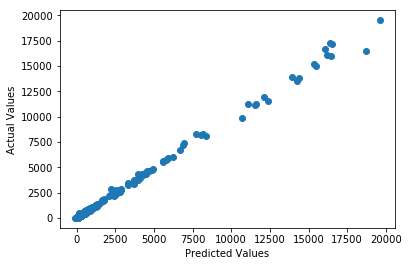

41.8900934623
14501.5464533
120.422366914


In [119]:
regression_pred = pd.DataFrame(regr.predict(X_validation_trans_))
plt.scatter(regression_pred,Y_validation)
plt.xlabel('Predicted Values')
plt.ylabel("Actual Values")
plt.show()
print(metrics.mean_absolute_error(Y_validation, regression_pred))
print(metrics.mean_squared_error(Y_validation, regression_pred))
print(np.sqrt(metrics.mean_squared_error(Y_validation, regression_pred)))

#### Polynomial regression has the highest accuracy among all the algorithms tested so far

In [55]:
print(store_accuracy)

[['Liner regression', 0.9923226645352774], ['KNN', 0.9884516593698609], ['Ridge', 0.99070832544894438], ['Lasso', 0.99223381050581183], ['SVM w/ linear', 0.99267919863761001], ['SVM w/ rbf', 0.99177670998206546], ['polynomial', 0.99718734853736191]]


# Importing the test data for final prediction
- Polynomial (degree = 2 will be used for the getting the final prediction)

In [56]:
testData.head()

,Date,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/1/2018 0:00,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,2/2/2018 0:00,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,2/3/2018 0:00,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,2/4/2018 0:00,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,2/5/2018 0:00,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


In [57]:
testData.isnull().sum()

Date                                                   0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions                                     0
btc_n_transactions_total       

In [58]:
print(testData.shape)
print(data.shape)
test = testData.iloc[:,1:23]
test.head()

(14, 23)
(2906, 25)


,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,16839687.5,1.529590e+11,1.509688e+09,154613.2244,1.053963,0,1610.400000,12.475000,20703947.91,2.603080e+12,...,0.799509,78.049647,591550,257664,296946448,249466,179686,2.190613e+06,276923.3207,2.515366e+09
1,16841787.5,1.499240e+11,2.213437e+09,154785.0008,1.022479,0,1404.273810,11.225000,21739145.31,2.603080e+12,...,0.717894,89.591902,551198,235918,297182366,229894,155128,1.460796e+06,330740.2192,2.944217e+09
2,16843762.5,1.528850e+11,9.524038e+08,154942.4583,0.996567,0,1233.487342,10.475000,20445148.56,2.603080e+12,...,1.290914,98.824757,436196,194891,297377257,184856,131568,9.100425e+05,164374.0244,1.491970e+09
3,16845987.5,1.415170e+11,1.080683e+09,155118.7652,0.990488,0,975.769663,9.275000,23033142.05,2.603080e+12,...,1.208997,112.999677,396694,173687,297550944,165753,125143,9.722485e+05,193244.2140,1.623377e+09
4,16848300.0,1.152220e+11,1.793319e+09,155322.7709,1.102733,0,1169.529730,6.133333,23938939.78,2.603080e+12,...,0.967008,78.586115,486553,216363,297767307,208757,144850,1.848913e+06,257109.2993,1.758323e+09


#### Applying all the necessay transformation on the test data before we run final predictions
- Scaler() for standardization
- PCA transformations and plynomial tranformation
- Trainning the model on entire data set 
- Final Prediction

In [59]:
# trainning model on the entire data set
train_std = std.transform(X)
train_trans = trans.transform(train_std)

#Model fit using polynomial regression
poly = PolynomialFeatures(degree = 2)
train_trans_ = poly.fit_transform(train_trans)

#initializing linear regression
regr = sklearn.linear_model.LinearRegression()
regr.fit(train_trans_,Y)
regr.score(train_trans_,Y)

0.9992929364401677

## Final prediction using polynomial regression

In [60]:
test_std = std.transform(test)
testData_trans = trans.transform(test_std)
testData_trans_ = poly.fit_transform(testData_trans)
pred = regr.predict(testData_trans_)
print(pred)

[[ 8692.08689254]
 [ 8132.71002822]
 [ 9080.24672337]
 [ 8057.27705961]
 [ 6482.26254511]
 [ 6773.55280981]
 [ 8071.70199761]
 [ 8306.5117365 ]
 [ 8577.27506382]
 [ 8289.4971638 ]
 [ 8077.57555903]
 [ 8661.76043916]
 [ 8647.15335414]
 [ 9072.61942314]]
